In [1]:
from corespray import corespraydf,load_galpy_potential
from galpy.potential import MWPotential2014
from galpy.util import conversion
from galpy.orbit import Orbit
import numpy as np
import matplotlib.pyplot as plt
import time
import clustertools as cts

In [2]:
gcname='M3'
mu0 = 0.
sig0 = 7.6
vesc0 = 30.0
logrho0 = 3.67
rho0 = 10.0**3.67
mgc = 4.06e5
rgc = 0.15903
rcore = 1.23
W0 = 8.61469762517307
mmin = 0.1
mmax = 1.4
alpha = -1.35
Porb = 0.38782091641000876*1000

#Load a custom array of stellar masses to be used
#for the mass function
data=np.loadtxt('imf.txt',skiprows=1)
masses=data[:,0]
masses0=data[:,7]

plt.scatter(masses0,masses)
plt.xlabel('M0')
plt.ylabel('M(t)')
plt.show()
plt.close()

In [3]:
masses=np.ones(10000)

In [4]:
mwpot = load_galpy_potential(bar=False,dw_arm=False,trans_arm=False)


In [15]:
cspray_d = corespraydf(gcname, mwpot, None, rgc, W0,)
cspray_s = corespraydf(gcname, mwpot, None, rgc, W0,)

In [16]:
#Pass keyword masses to sample_three_body
np.random.seed(1)
print('INIT:')
dttime=time.time()

osd = cspray_d.sample_three_body(1000., nstar=10, binaries=False, mu0=mu0, sig0=sig0, vesc0=vesc0, rho0=rho0, masses=masses,verbose=False,timing=False,method='dop853_c')

print('SAMPLE:',time.time()-dttime)
dttime=time.time()

INIT:
SAMPLE: 0.23003196716308594


In [17]:
#Pass keyword masses to sample_three_body
np.random.seed(1)
print('INIT:')
dttime=time.time()

oss = cspray_s.sample_three_body(1000, nstar=10, binaries=False, mu0=mu0, sig0=sig0, vesc0=vesc0, rho0=rho0, masses=masses,verbose=False,timing=False,method='symplec4_c')

print('SAMPLE:',time.time()-dttime)
dttime=time.time()

INIT:
SAMPLE: 0.4040389060974121


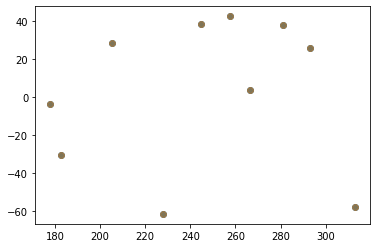

In [18]:
plt.scatter(cspray_d.oi.ra(),cspray_d.oi.dec())
plt.scatter(cspray_s.oi.ra(),cspray_s.oi.dec(),alpha=0.5)

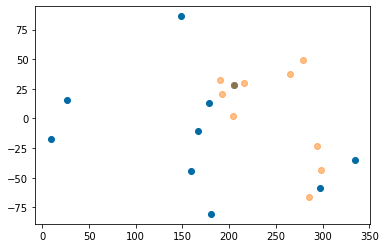

In [19]:
plt.scatter(cspray_d.of.ra(),cspray_d.of.dec())
plt.scatter(cspray_s.of.ra(),cspray_s.of.dec(),alpha=0.5)

In [20]:
tmax=-1./conversion.time_in_Gyr(ro=8,vo=220.)
ts=np.linspace(-tmax,0,10000)

cspray_d.oi.integrate(ts,cspray_d.pot,method='dop853_c')
cspray_s.oi.integrate(ts,cspray_s.pot,method='symplec4_c')


In [21]:
cspray_s.tesc==cspray_d.tesc

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [24]:
tint=-cspray_s.tesc/1000.0/conversion.time_in_Gyr(ro=8,vo=220.)

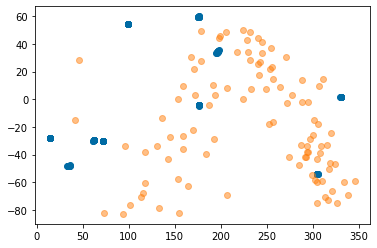

In [25]:
plt.scatter(cspray_d.oi.ra(tint),cspray_d.oi.dec(tint))
plt.scatter(cspray_s.oi.ra(tint),cspray_s.oi.dec(tint),alpha=0.5)


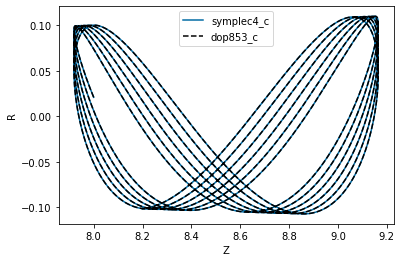

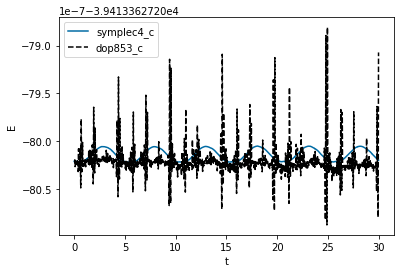

In [50]:
o1=Orbit()
o2=Orbit()

ts=np.linspace(0,30,10000)
o1.integrate(ts,MWPotential2014,method='symplec4_c')
o2.integrate(ts,MWPotential2014,method='dop853_c')

plt.plot(o1.R(ts),o1.z(ts),label='symplec4_c')
plt.plot(o2.R(ts),o2.z(ts),'k--',label='dop853_c')
plt.legend()
plt.ylabel('R')
plt.xlabel('Z')
plt.show()
plt.close()

plt.plot(ts,o1.E(ts),label='symplec4_c')
plt.plot(ts,o2.E(ts),'k--',label='dop853_c')
plt.legend()
plt.ylabel('E')
plt.xlabel('t')
plt.show()
plt.close()

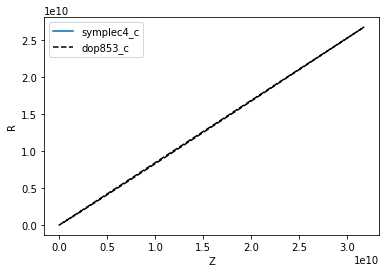

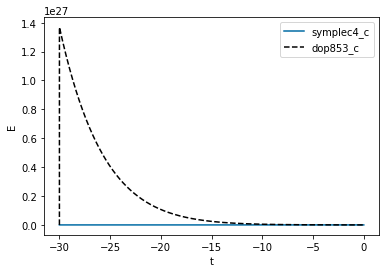

In [52]:
o1=Orbit()
o2=Orbit()

ts=np.linspace(-30,0,10000)
o1.integrate(ts,MWPotential2014,method='symplec4_c')
o2.integrate(ts,MWPotential2014,method='dop853_c')

plt.plot(o1.R(ts),o1.z(ts),label='symplec4_c')
plt.plot(o2.R(ts),o2.z(ts),'k--',label='dop853_c')
plt.legend()
plt.ylabel('R')
plt.xlabel('Z')
plt.show()
plt.close()

plt.plot(ts,o1.E(ts),label='symplec4_c')
plt.plot(ts,o2.E(ts),'k--',label='dop853_c')
plt.legend()
plt.ylabel('E')
plt.xlabel('t')
plt.show()
plt.close()

In [62]:
o1=Orbit()
o2=Orbit()

ts=np.linspace(0,30,10000)
o1.integrate(ts,MWPotential2014,method='symplec4_c')
o2.integrate(ts,MWPotential2014,method='dop853_c')

print('Radii: ',o1.r(ts[-1])-o2.r(ts[-1]))
print('Energies: ',o1.E(ts[-1])-o2.E(ts[-1]))

o1=Orbit()
o2=Orbit()

ts=np.linspace(-30,0,10000)
o1.integrate(ts,MWPotential2014,method='symplec4_c')
o2.integrate(ts,MWPotential2014,method='dop853_c')

print('Radii: ',o1.r(ts[-1])-o2.r(ts[-1]))
print('Energies: ',o1.E(ts[-1])-o2.E(ts[-1]))


Radii:  1.47604595213e-10
Energies:  -1.12646375783e-07
Radii:  -304190638.474
Energies:  -8.30005063066e+22
